今回はたくさんのパッケージのインストールが必要です（結構時間がかかるかもしれません）

In [1]:
# using Pkg
# Pkg.add("Images")
# Pkg.add("TestImages")
using Images, TestImages, LinearAlgebra, Plots

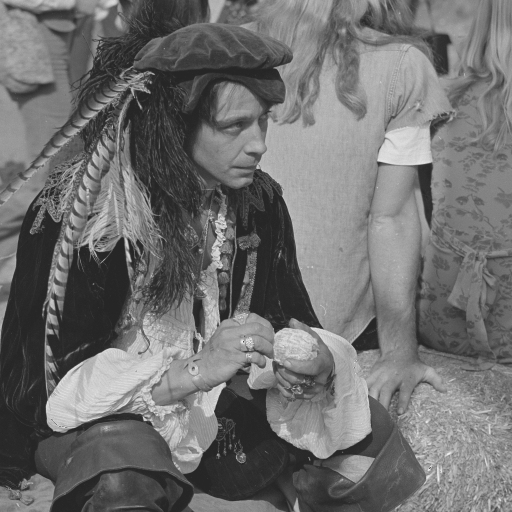

In [2]:
image = testimage("pirate") # テスト画像の読み込み（右のURLから好きなものを選んで，pirateの部分を書き換えればOK）．https://testimages.juliaimages.org/

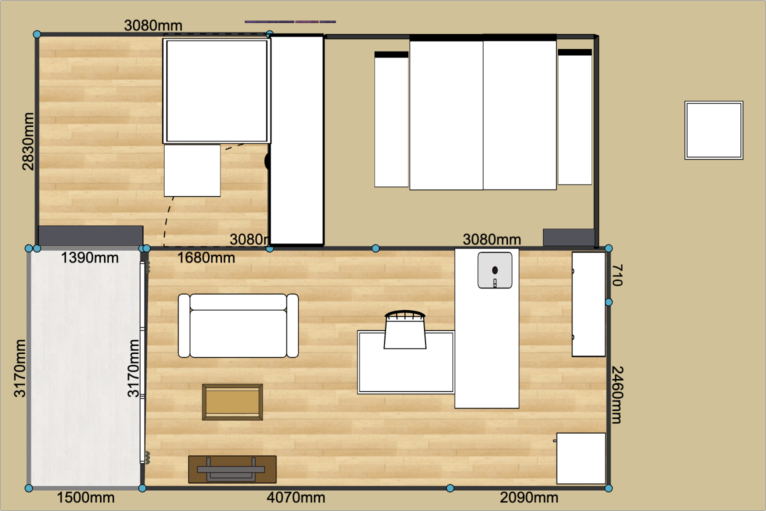

In [2]:
image = load("testimage.png") # 自分の好きな画像で試してみるのも面白いと思います(画像はこのipynbファイルと同じフォルダにおいてください)．
# image = Gray.(image) # グレー画像に変換；もとがグレー画像だとしても，読み込みのときにカラーの形式で読み込まれることもあるので注意してください．

In [3]:
A = channelview(image) # 2次元配列（行列）に変換．行や列のサイズが1000を超えるな画像だと，この後の計算がかなり重たくなる．

512×512 reinterpret(reshape, N0f8, ::Array{Gray{N0f8},2}) with eltype N0f8:
 0.588  0.596  0.608  0.62   0.659  …  0.506  0.498  0.525  0.51   0.522
 0.58   0.565  0.569  0.58   0.604     0.506  0.498  0.529  0.506  0.506
 0.604  0.569  0.533  0.506  0.502     0.49   0.502  0.537  0.502  0.498
 0.6    0.58   0.541  0.498  0.439     0.498  0.51   0.518  0.502  0.506
 0.624  0.62   0.569  0.514  0.412     0.494  0.506  0.518  0.498  0.494
 0.627  0.608  0.584  0.525  0.451  …  0.51   0.518  0.522  0.494  0.498
 0.62   0.62   0.604  0.549  0.471     0.502  0.522  0.522  0.498  0.506
 0.62   0.624  0.596  0.569  0.525     0.494  0.51   0.522  0.49   0.502
 0.612  0.6    0.584  0.58   0.537     0.486  0.506  0.514  0.486  0.51
 0.6    0.592  0.6    0.58   0.573     0.486  0.51   0.506  0.486  0.506
 ⋮                                  ⋱                       ⋮      
 0.584  0.565  0.576  0.557  0.573     0.675  0.639  0.553  0.58   0.545
 0.573  0.565  0.545  0.553  0.561     0.62   0.561  0

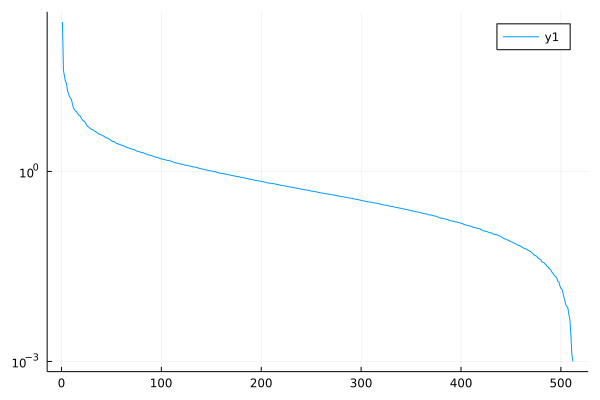

In [4]:
F = svd(A) #特異値分解
plot(F.S,yaxis=:log) # 特異値の分布を大きい順にプロット

In [17]:
n=100 # 大きい方からn個の特異値を使って低ランク近似
U, S, V = F
u = U[:,1:n]
s = S[1:n]
v = V[:,1:n]
An = u * Diagonal(s) * v'

512×512 Matrix{Float32}:
 0.619788  0.614656  0.600014  0.621356  …  0.531291  0.470167  0.47532
 0.604068  0.597288  0.575156  0.578384     0.525852  0.475216  0.476919
 0.5855    0.580755  0.556337  0.536543     0.521135  0.484131  0.482402
 0.577294  0.574379  0.555306  0.515556     0.526532  0.510639  0.502899
 0.592588  0.587619  0.569875  0.516954     0.523865  0.520644  0.517287
 0.608632  0.592099  0.575264  0.525333  …  0.524591  0.526073  0.521657
 0.614765  0.598305  0.571427  0.53908      0.5198    0.513616  0.511848
 0.619888  0.606429  0.578893  0.560591     0.514689  0.498349  0.502015
 0.602621  0.596656  0.585411  0.574599     0.512401  0.481034  0.493651
 0.598357  0.59551   0.595464  0.590935     0.516779  0.464676  0.488189
 ⋮                                       ⋱            ⋮         
 0.568514  0.574019  0.556001  0.533267     0.543005  0.544737  0.562214
 0.54712   0.563367  0.538424  0.538334     0.514968  0.512124  0.546321
 0.530801  0.531096  0.50974   0.51

$n$を大きくしていくと元の画像に近づいて行く様子を体感してみましょう（小さな$n$も試してください）．（画像にも依存しますが）どのくらいの$n$でぱっと見た感じで区別がつかなくなるでしょうか？

In [ ]:
Gray.(An)

: 

In [19]:
save("test.pdf",Gray.(An))